In [256]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('ted.csv')
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,Dec-21,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,Feb-22,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,Sep-21,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,Oct-21,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,Oct-21,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [258]:
df.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


In [401]:
df.isnull().sum()

title     0
author    0
date      0
views     0
likes     0
link      0
month     0
year      0
ratio     0
dtype: int64

In [402]:
df.dropna(inplace = True)

In [421]:
#Checking correlation between likes and views

corr = df.corr()

print(corr['views'])

views    1.000000
likes    0.999661
ratio   -0.114248
Name: views, dtype: float64


In [403]:
#Finding the most popular TED talks
df_talk = df.sort_values(by = ['likes','views'], ascending = False).head()[['title']]
df_talk

,title
5436,Do schools kill creativity?
4084,Your body language may shape who you are
2958,Inside the mind of a master procrastinator
4765,How great leaders inspire action
4605,The power of vulnerability


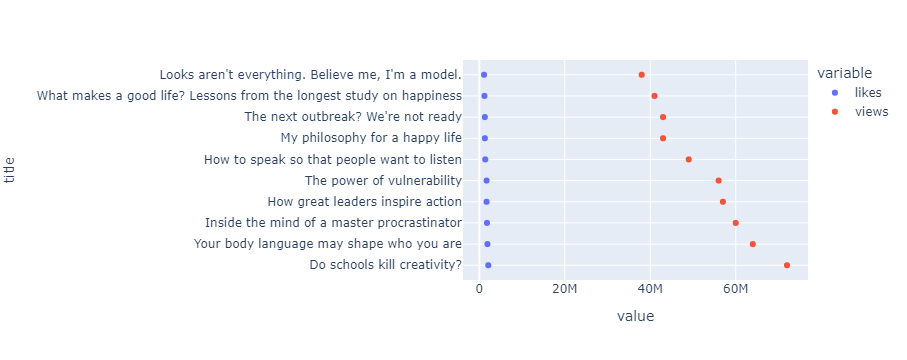

In [404]:
import plotly.express as px
df_likes_views = df.sort_values(by = ['likes','views'], ascending = False)
fig = px.scatter(df_likes_views.head(10), x= ['likes','views'], y = 'title')
fig.show()

In [405]:
#Finding the most popular TED talks Speaker (in terms of number of talks)
df_speaker = df.sort_values(by = ['likes','views'], ascending = False).head()['author']

In [406]:
df_authors = df['author'].value_counts().reset_index()
df_authors.columns = ['author', 'counts']
df_authors = df_authors.sort_values(by = 'counts', ascending = False).head(10)
df_authors

,author,counts
0,Alex Gendler,45
1,Iseult Gillespie,33
2,Matt Walker,18
3,Alex Rosenthal,15
4,Elizabeth Cox,13
5,Emma Bryce,12
6,Juan Enriquez,11
7,Daniel Finkel,11
8,Mona Chalabi,9
9,Jen Gunter,9


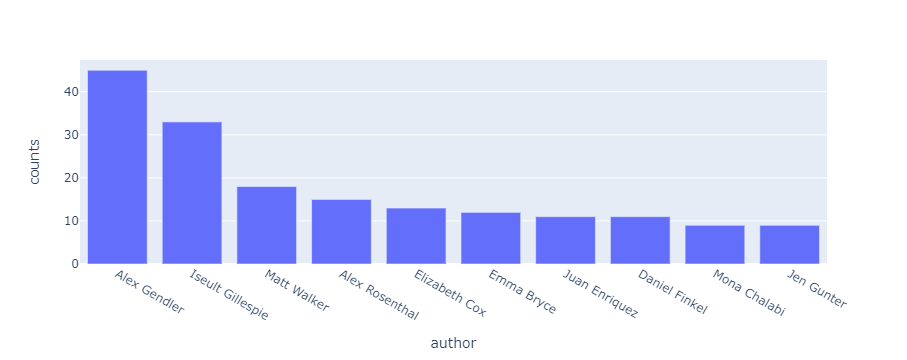

In [407]:
px_author = px.bar(df_authors, x = 'author', y= 'counts')
px_author

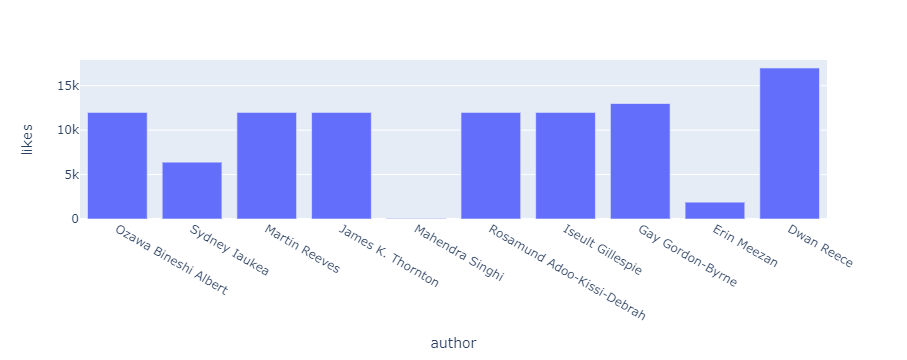

In [408]:
fig = px.bar(df.head(10), x = 'author', y = 'likes')
fig

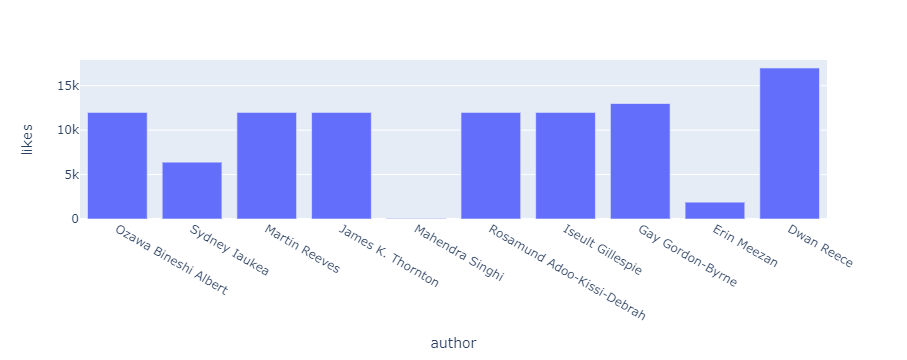

In [409]:
sort_author = df.sort_values(by = ['views','likes'])
fg = px.scatter(sort_author, x = 'author', y =['likes','views'])
fg.update_traces(marker_size=10)
fig.show()

In [410]:
df.groupby(['author']).sum().sort_values(by = ['likes','views'], ascending = False)

,views,likes,ratio
author,,,
Alex Gendler,187196000,5691000,1494.122993
Sir Ken Robinson,95654000,2833600,165.035093
Bill Gates,77800000,2349000,264.751586
Simon Sinek,74800000,2246000,98.325330
Brené Brown,72000000,2204000,64.687208
...,...,...,...
Peggy Chan,2100,65,32.307692
Dave Matthews,1600,49,32.653061
Qi Wu 吴琪,1500,47,31.914894


In [411]:
#month wise analysis 
month = []
year = []

for i in df.date:
    month.append(i.split('-')[0])
    year.append(i.split('-')[1])
    
df['month'] = month
df['year'] = year

In [412]:
df.head()

,title,author,date,views,likes,link,month,year,ratio
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,Dec-21,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,Dec,21,33.666667
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,Feb-22,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,Feb,22,33.437500
2,How play can spark new ideas for your business,Martin Reeves,Sep-21,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,Sep,21,34.333333
3,Why is China appointing judges to combat clima...,James K. Thornton,Oct-21,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,Oct,21,35.583333
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,Oct-21,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,Oct,21,33.333333


In [413]:
import plotly.express as px
import matplotlib.pyplot as plt

monthly_ted = df['month'].value_counts(ascending = False)
monthly_ted

Feb    725
Nov    682
Oct    585
Mar    580
Apr    576
Jun    493
Jul    446
Sep    349
Dec    334
May    322
Aug    200
Jan    147
Name: month, dtype: int64

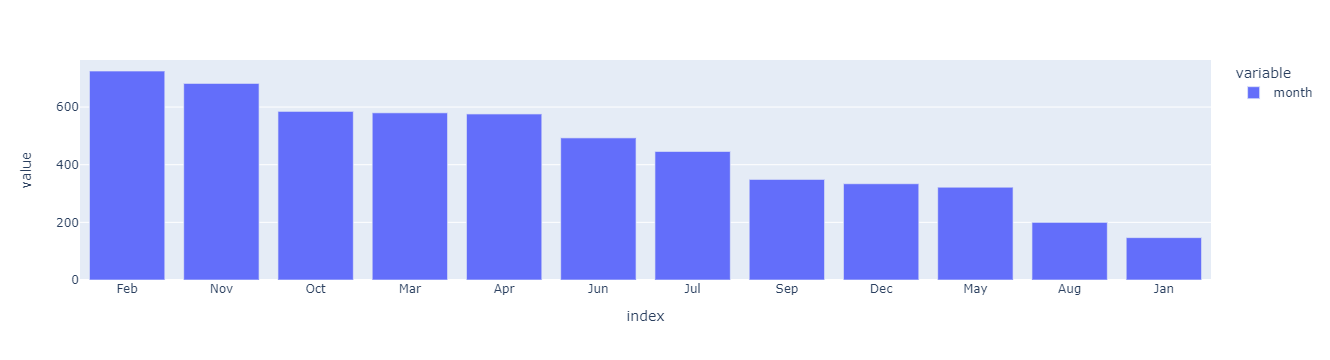

In [447]:
fig = px.bar(monthly_ted)
fig.show()

In [443]:
import plotly.express as px

t_p = df['month'].value_counts()
t_p

Feb    725
Nov    682
Oct    585
Mar    580
Apr    576
Jun    493
Jul    446
Sep    349
Dec    334
May    322
Aug    200
Jan    147
Name: month, dtype: int64

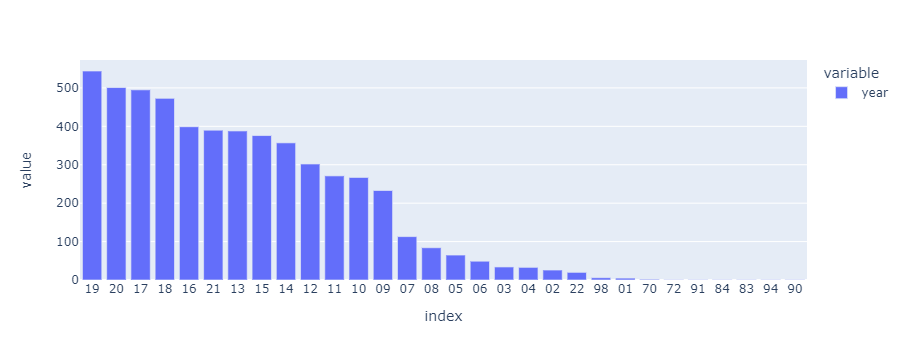

In [415]:
#Year-wise analysis of TED talk frequency
year_ted = df['year'].value_counts(ascending = False)
fig_1 = px.bar(year_ted)
fig_1

In [416]:
#Finding TED talks of your favorite Author
fav = df[df['author'] == 'Amy Cuddy']
fav

,title,author,date,views,likes,link,month,year,ratio
4084,Your body language may shape who you are,Amy Cuddy,Jun-12,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,Jun,12,33.684211


In [417]:
#Finding TED talks with the best view to like ration
df['ratio'] = df['views']/df['likes']
df.sort_values(by = 'ratio', ascending = False).head(10)

,title,author,date,views,likes,link,month,year,ratio
955,A camera that can see around corners,David Lindell,Nov-19,364000,10000,https://ted.com/talks/david_lindell_a_camera_t...,Nov,19,36.400000
905,What's the point(e) of ballet?,Ming Luke,Apr-20,364000,10000,https://ted.com/talks/ming_luke_what_s_the_poi...,Apr,20,36.400000
837,How to see more and care less: The art of Geor...,Iseult Gillespie,Jun-20,364000,10000,https://ted.com/talks/iseult_gillespie_how_to_...,Jun,20,36.400000
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,Feb-22,363000,10000,https://ted.com/talks/elizabeth_cox_can_you_ou...,Feb,22,36.300000
1016,The function and fashion of eyeglasses,Debbie Millman,Jan-20,363000,10000,https://ted.com/talks/debbie_millman_the_funct...,Jan,20,36.300000
3089,How computers translate human language,Ioannis Papachimonas,Oct-15,398000,11000,https://ted.com/talks/ioannis_papachimonas_how...,Oct,15,36.181818
4389,The right to understand,Sandra Fisher-Martins,Mar-11,361000,10000,https://ted.com/talks/sandra_fisher_martins_th...,Mar,11,36.100000
4362,How to topple a dictator,Srdja Popovic,Nov-11,397000,11000,https://ted.com/talks/srdja_popovic_how_to_top...,Nov,11,36.090909
5129,On glamour,Virginia Postrel,Feb-04,433000,12000,https://ted.com/talks/virginia_postrel_on_glamour,Feb,04,36.083333
1125,Hacking bacteria to fight cancer,Tal Danino,Dec-19,396000,11000,https://ted.com/talks/tal_danino_hacking_bacte...,Dec,19,36.000000
